## Lag Plot

*A lag plot is a special type of scatter plot in which the X-axis represents the dataset with some time units behind or ahead as compared to the Y-axis. The difference between these time units is called lag or lagged and it is represented by k.*

*The lag plot contains the following axes:*

**Vertical axis:** *Yi for all i*

**Horizontal axis:** *Yi-k for all i, where k is lag value.*

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sc
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

### Distribution of Model

*Distribution of model here means deciding what is the shape of data on the basis of the lag plot.*

*If the lag plot is linear, then the underlying structure is of the autoregressive model.*

*If the lag plot is of elliptical shape, then the underlying structure represents a continuous periodic function such as sine, cosine, etc.*

### Lag Plot for Sine Graph

In [2]:
time= np.arange(0, 10, 0.1);
amplitude=np.sin(time)
amplitude_series = pd.Series(amplitude)

In [3]:
time

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [4]:
amplitude

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

In [5]:
amplitude_series

0     0.000000
1     0.099833
2     0.198669
3     0.295520
4     0.389418
        ...   
95   -0.075151
96   -0.174327
97   -0.271761
98   -0.366479
99   -0.457536
Length: 100, dtype: float64

In [6]:
amplitude_series.describe()

count    100.000000
mean       0.186474
std        0.667424
min       -0.999923
25%       -0.368329
50%        0.315320
75%        0.800989
max        0.999574
dtype: float64

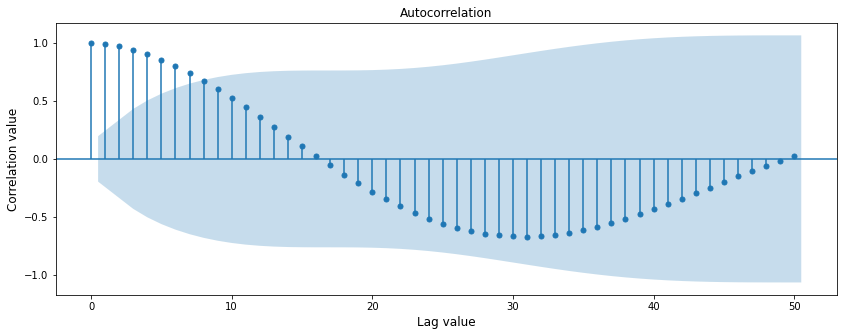

In [7]:
rcParams['figure.figsize'] = 14, 5
plot_acf(amplitude_series, lags=50)
plt.xlabel("Lag value",fontsize=12)
plt.ylabel("Correlation value",fontsize=12)
plt.show()

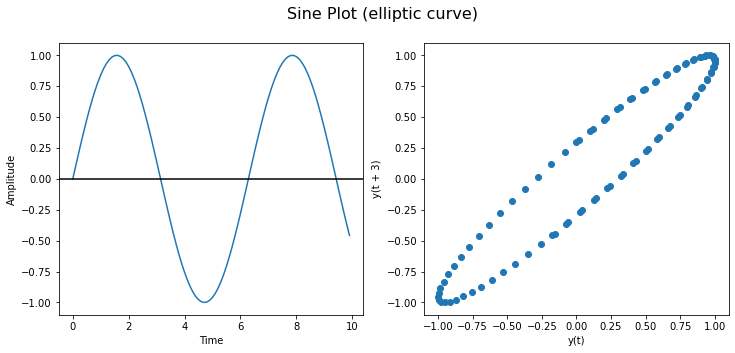

In [8]:
# Sine graph and lag plot
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(time, amplitude)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].axhline(y=0, color='k')
pd.plotting.lag_plot(amplitude_series, lag= 3, ax =ax[1])
plt.suptitle('Sine Plot (elliptic curve)',fontsize=16)
plt.show()

**If the lag plot is of elliptical shape, then the underlying structure represents a continuous periodic function such as sine, cosine, etc.**

### Randomness in Data

**The lag plot is also useful for checking whether the given dataset is random or not. If there is randomness in the data then it will be reflected in the lag plot, if there is no pattern in the lag plot.**

In [9]:
sample_size=1000
random_series=  pd.DataFrame(np.random.normal(size=sample_size))
random_series.reset_index(inplace=True)

In [10]:
random_series.head()

,index,0
0,0,0.956296
1,1,-0.852785
2,2,0.225530
3,3,-1.125544
4,4,0.798920


In [11]:
random_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1000 non-null   int64  
 1   0       1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [12]:
random_series.describe()

,index,0
count,1000.000000,1000.000000
mean,499.500000,0.028292
std,288.819436,0.996439
min,0.000000,-2.889088
25%,249.750000,-0.645373
50%,499.500000,0.057042
75%,749.250000,0.692025
max,999.000000,3.320172


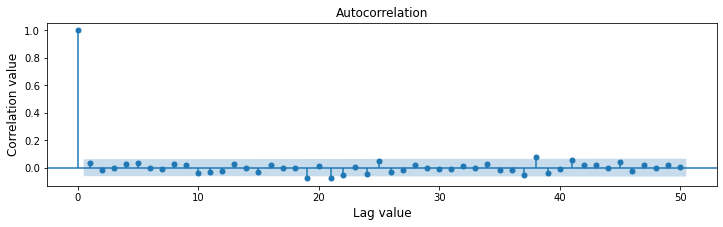

In [13]:
rcParams['figure.figsize'] = 12, 3
plot_acf(random_series[0], lags=50)
plt.xlabel("Lag value",fontsize=12)
plt.ylabel("Correlation value",fontsize=12)
plt.show()

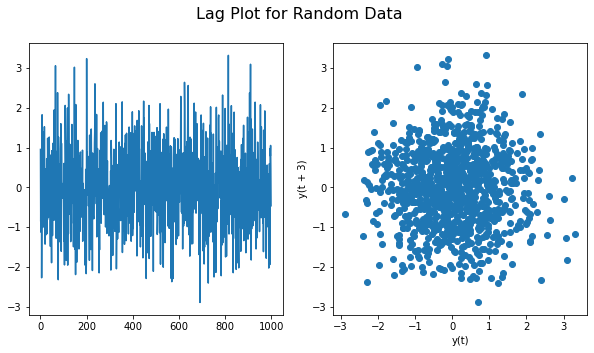

In [14]:
# Random and Lag Plot
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(random_series['index'],random_series[0])
pd.plotting.lag_plot(random_series[0],lag = 3)
plt.suptitle('Lag Plot for Random Data',fontsize=16)
plt.show()

## Auto-Correlation

*If the lag plot gives a linear plot, then it means the autocorrelation is present in the data, whether there is positive autocorrelation or negative that depends upon the slope of the line of the dataset. If more data is concentrated on the diagonal in lag plot, it means there is a strong autocorrelation.*


### Strong Auto-Correlation

In [15]:
google_stock_data = pd.read_csv('datasets/GOOG.csv')
google_stock_data.reset_index(inplace=True)
google_stock_data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2012-01-27,284.324280,289.076477,283.601990,288.907104,288.907104,7262119
1,1,2012-01-30,287.945709,288.917053,285.629395,287.766388,287.766388,4678471
2,2,2012-01-31,290.411469,290.909607,286.501129,288.971863,288.971863,4300860
3,3,2012-02-01,291.377838,291.656799,288.488678,289.330505,289.330505,4658797
4,4,2012-02-02,291.342987,292.110107,289.953186,291.462524,291.462524,4847502


In [16]:
google_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      2517 non-null   int64  
 1   Date       2517 non-null   object 
 2   Open       2517 non-null   float64
 3   High       2517 non-null   float64
 4   Low        2517 non-null   float64
 5   Close      2517 non-null   float64
 6   Adj Close  2517 non-null   float64
 7   Volume     2517 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 157.4+ KB


In [17]:
google_stock_data.describe()

,index,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,1258.000000,1004.764363,1014.137637,995.634161,1005.209000,1005.209000,2.315764e+06
std,726.739637,642.222981,648.605434,636.385112,642.634640,642.634640,1.775787e+06
min,0.000000,279.123779,281.205963,277.220917,278.481171,278.481171,7.922000e+03
25%,629.000000,539.259460,543.328308,535.250000,539.299377,539.299377,1.271000e+06
50%,1258.000000,807.250000,811.840027,803.369995,807.880005,807.880005,1.692100e+06
75%,1887.000000,1203.410034,1212.015015,1194.579956,1205.099976,1205.099976,2.828362e+06
max,2516.000000,3020.000000,3037.000000,2997.750000,3014.179932,3014.179932,2.497807e+07


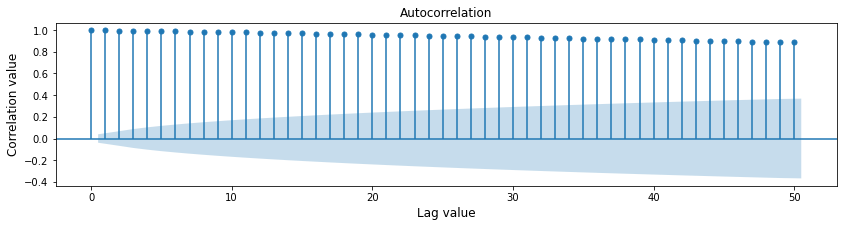

In [18]:
rcParams['figure.figsize'] = 14, 3
plot_acf(google_stock_data['Adj Close'], lags=50)
plt.xlabel("Lag value",fontsize=12)
plt.ylabel("Correlation value",fontsize=12)
plt.show()

**From acf graph observation "Adj close" has high auto-correlation at lag 1.**

**There is no significance reduction in auto-correlation, even increased the lag value.**

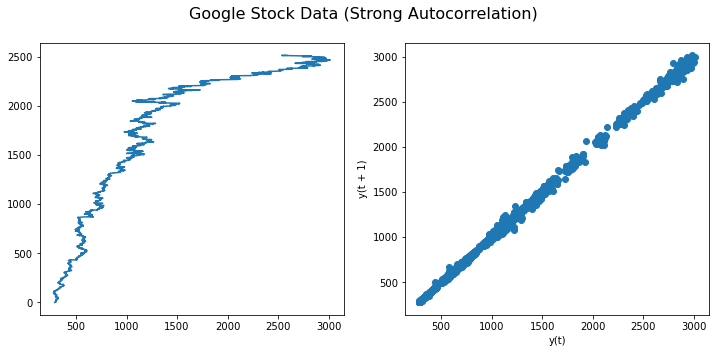

In [19]:
# Google Stock and Lag Plot (Strong Autocorrelation)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(google_stock_data['Adj Close'], google_stock_data['index'])
pd.plotting.lag_plot(google_stock_data['Adj Close'], lag=1,ax=ax[1])
plt.suptitle('Google Stock Data (Strong Autocorrelation)',fontsize=16)
plt.show()

**From the graph we can observe:**

   **1.The data come from an underlying autoregressive model with strong positive autocorrelation.**

  **2.The data contain no outliers.**

In [20]:
google_stock_data['lag1_Adj Close'] = google_stock_data['Adj Close'].shift(1)
google_stock_data['lag2_Adj Close'] = google_stock_data['Adj Close'].shift(2)
google_stock_data['lag3_Adj Close'] = google_stock_data['Adj Close'].shift(3)
google_stock_data['lag4_Adj Close'] = google_stock_data['Adj Close'].shift(4)
google_stock_data['lag5_Adj Close'] = google_stock_data['Adj Close'].shift(5)

In [21]:
google_stock_data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,lag1_Adj Close,lag2_Adj Close,lag3_Adj Close,lag4_Adj Close,lag5_Adj Close
0,0,2012-01-27,284.324280,289.076477,283.601990,288.907104,288.907104,7262119,NaN,NaN,NaN,NaN,NaN
1,1,2012-01-30,287.945709,288.917053,285.629395,287.766388,287.766388,4678471,288.907104,NaN,NaN,NaN,NaN
2,2,2012-01-31,290.411469,290.909607,286.501129,288.971863,288.971863,4300860,287.766388,288.907104,NaN,NaN,NaN
3,3,2012-02-01,291.377838,291.656799,288.488678,289.330505,289.330505,4658797,288.971863,287.766388,288.907104,NaN,NaN
4,4,2012-02-02,291.342987,292.110107,289.953186,291.462524,291.462524,4847502,289.330505,288.971863,287.766388,288.907104,NaN


In [22]:
google_stock_data.corr()

,index,Open,High,Low,Close,Adj Close,Volume,lag1_Adj Close,lag2_Adj Close,lag3_Adj Close,lag4_Adj Close,lag5_Adj Close
index,1.000000,0.889833,0.890756,0.889323,0.890135,0.890135,-0.552755,0.890043,0.889938,0.889853,0.889767,0.889705
Open,0.889833,1.000000,0.999877,0.999858,0.999730,0.999730,-0.424210,0.999825,0.999393,0.998986,0.998579,0.998223
High,0.890756,0.999877,1.000000,0.999819,0.999862,0.999862,-0.422535,0.999718,0.999342,0.998955,0.998614,0.998284
Low,0.889323,0.999858,0.999819,1.000000,0.999881,0.999881,-0.427048,0.999689,0.999246,0.998801,0.998375,0.997988
Close,0.890135,0.999730,0.999862,0.999881,1.000000,1.000000,-0.425265,0.999563,0.999190,0.998784,0.998416,0.998071
Adj Close,0.890135,0.999730,0.999862,0.999881,1.000000,1.000000,-0.425265,0.999563,0.999190,0.998784,0.998416,0.998071
Volume,-0.552755,-0.424210,-0.422535,-0.427048,-0.425265,-0.425265,1.000000,-0.424373,-0.423482,-0.422614,-0.421997,-0.421274
lag1_Adj Close,0.890043,0.999825,0.999718,0.999689,0.999563,0.999563,-0.424373,1.000000,0.999563,0.999188,0.998781,0.998417
lag2_Adj Close,0.889938,0.999393,0.999342,0.999246,0.999190,0.999190,-0.423482,0.999563,1.000000,0.999565,0.999189,0.998788
lag3_Adj Close,0.889853,0.998986,0.998955,0.998801,0.998784,0.998784,-0.422614,0.999188,0.999565,1.000000,0.999564,0.999189


**At lag 1,the correlation value between "Adj Close" and "lag1_Adj Close" is 0.999563.**

**From above graph and correlation table we can conclude that "Adj close" highly auto-correlated at lag 1.**

**Even if increase lag value but there is no significance reduction in auto-correlation.**

### Moderate Auto-Correlation

In [23]:
min_temp_data = pd.read_csv('datasets/daily-min-temperatures.csv')
min_temp_data.reset_index(inplace=True)
min_temp_data.head()

,index,Date,Temp
0,0,1981-01-01,20.7
1,1,1981-01-02,17.9
2,2,1981-01-03,18.8
3,3,1981-01-04,14.6
4,4,1981-01-05,15.8


In [24]:
min_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   3650 non-null   int64  
 1   Date    3650 non-null   object 
 2   Temp    3650 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 85.7+ KB


In [25]:
min_temp_data.describe()

,index,Temp
count,3650.000000,3650.000000
mean,1824.500000,11.177753
std,1053.808569,4.071837
min,0.000000,0.000000
25%,912.250000,8.300000
50%,1824.500000,11.000000
75%,2736.750000,14.000000
max,3649.000000,26.300000


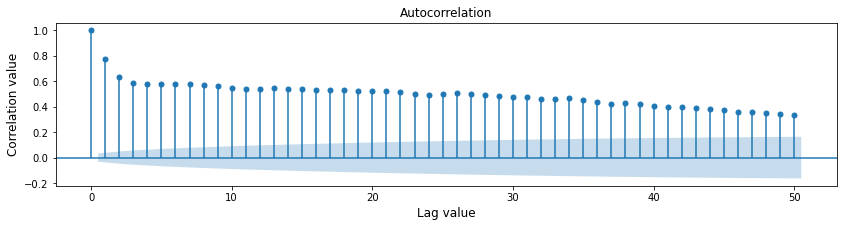

In [26]:
rcParams['figure.figsize'] = 14, 3
plot_acf(min_temp_data["Temp"], lags=50)
plt.xlabel("Lag value",fontsize=12)
plt.ylabel("Correlation value",fontsize=12)
plt.show()

**From acf graph observation "Temp" has high correlation value(0.8) at lag 1.**

**If lag values increase then correlation value significantly reduce.**

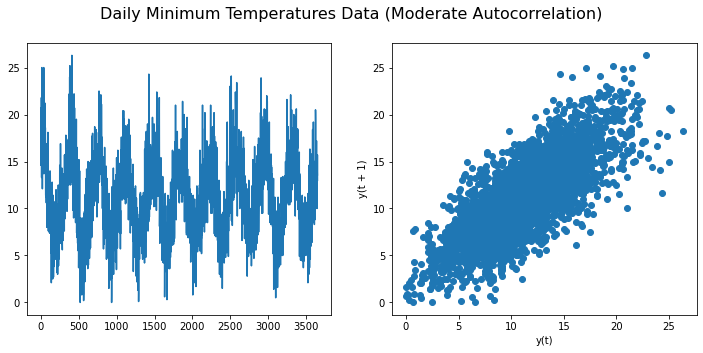

In [27]:
# Daily Minimum Temperatures (Weak Autocorrelation)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(min_temp_data["index"], min_temp_data['Temp'])
pd.plotting.lag_plot(min_temp_data["Temp"],lag=1,ax =ax[1])
plt.suptitle('Daily Minimum Temperatures Data (Moderate Autocorrelation)',fontsize=16)
plt.show()

In [28]:
min_temp_data["Lag1_Temp"] = min_temp_data["Temp"].shift(1)
min_temp_data["Lag2_Temp"] = min_temp_data["Temp"].shift(2)
min_temp_data["Lag3_Temp"] = min_temp_data["Temp"].shift(3)
min_temp_data["Lag4_Temp"] = min_temp_data["Temp"].shift(4)
min_temp_data["Lag5_Temp"] = min_temp_data["Temp"].shift(5)

In [29]:
min_temp_data.head()

,index,Date,Temp,Lag1_Temp,Lag2_Temp,Lag3_Temp,Lag4_Temp,Lag5_Temp
0,0,1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN
1,1,1981-01-02,17.9,20.7,NaN,NaN,NaN,NaN
2,2,1981-01-03,18.8,17.9,20.7,NaN,NaN,NaN
3,3,1981-01-04,14.6,18.8,17.9,20.7,NaN,NaN
4,4,1981-01-05,15.8,14.6,18.8,17.9,20.7,NaN


In [30]:
min_temp_data.corr()

,index,Temp,Lag1_Temp,Lag2_Temp,Lag3_Temp,Lag4_Temp,Lag5_Temp
index,1.000000,0.012180,0.011973,0.011452,0.011186,0.010909,0.010584
Temp,0.012180,1.000000,0.774870,0.631119,0.586375,0.578898,0.578572
Lag1_Temp,0.011973,0.774870,1.000000,0.774886,0.631095,0.586346,0.578866
Lag2_Temp,0.011452,0.631119,0.774886,1.000000,0.774878,0.631051,0.586273
Lag3_Temp,0.011186,0.586375,0.631095,0.774878,1.000000,0.774857,0.631012
Lag4_Temp,0.010909,0.578898,0.586346,0.631051,0.774857,1.000000,0.774832
Lag5_Temp,0.010584,0.578572,0.578866,0.586273,0.631012,0.774832,1.000000


**At lag 1,the correlation value between "Temp" and "lag1_Temp" is 0.774870.**

**From above graph and correlation table we can conclude that "Temp" highly auto-correlated at lag 1.**

**From the above correlation table we can conclude if lag values increase then correlation value significantly reduce.**

### NO Auto-Correlation

In [31]:
sample_size=1000
random_data =  pd.DataFrame(np.random.normal(size=sample_size))
random_data.reset_index(inplace=True)
random_data.head()

,index,0
0,0,-0.823913
1,1,0.060936
2,2,1.354124
3,3,0.497268
4,4,0.776392


In [32]:
random_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1000 non-null   int64  
 1   0       1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [33]:
random_data.describe()

,index,0
count,1000.000000,1000.000000
mean,499.500000,-0.017509
std,288.819436,1.037268
min,0.000000,-3.399330
25%,249.750000,-0.680382
50%,499.500000,0.000946
75%,749.250000,0.683416
max,999.000000,3.328856


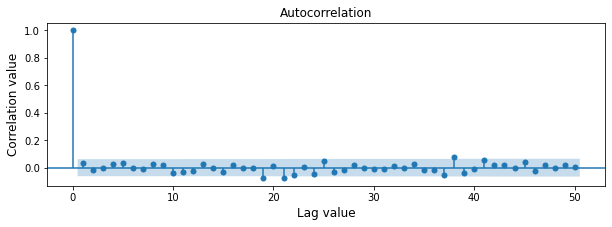

In [34]:
rcParams['figure.figsize'] = 10, 3
plot_acf(random_series[0], lags=50)
plt.xlabel("Lag value",fontsize=12)
plt.ylabel("Correlation value",fontsize=12)
plt.show()

**From acf graph observation "Random Series" has no correlation value at any lag value.**

**Even if increase lag value but there is no significance change in corrleation.**

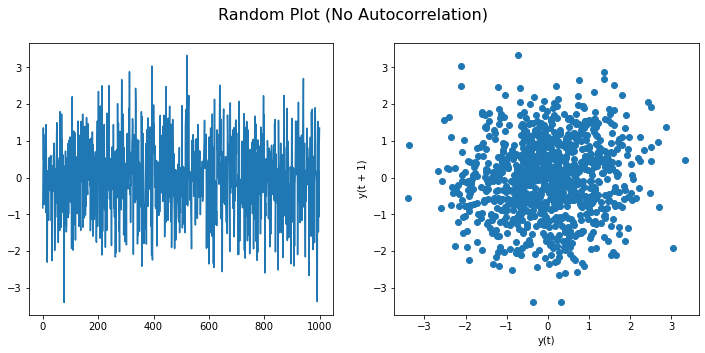

In [35]:
# Random and Lag Plot
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(random_data['index'],random_data[0])
pd.plotting.lag_plot(random_data[0],lag = 1)
plt.suptitle('Random Plot (No Autocorrelation)',fontsize=16)
plt.show()

In [36]:
random_data["Lag_1"] = random_data[0].shift(1)
random_data["Lag_2"] = random_data[0].shift(2)
random_data["Lag_3"] = random_data[0].shift(3)
random_data["Lag_4"] = random_data[0].shift(4)
random_data["Lag_5"] = random_data[0].shift(5)

In [37]:
random_data.head()

,index,0,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
0,0,-0.823913,NaN,NaN,NaN,NaN,NaN
1,1,0.060936,-0.823913,NaN,NaN,NaN,NaN
2,2,1.354124,0.060936,-0.823913,NaN,NaN,NaN
3,3,0.497268,1.354124,0.060936,-0.823913,NaN,NaN
4,4,0.776392,0.497268,1.354124,0.060936,-0.823913,NaN


In [38]:
random_data.corr()

,index,0,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
index,1.000000,-0.023342,-0.025690,-0.027203,-0.025496,-0.025894,-0.023502
0,-0.023342,1.000000,0.081505,-0.018464,0.038718,-0.016496,0.036314
Lag_1,-0.025690,0.081505,1.000000,0.080489,-0.017148,0.038479,-0.014652
Lag_2,-0.027203,-0.018464,0.080489,1.000000,0.081416,-0.017329,0.039729
Lag_3,-0.025496,0.038718,-0.017148,0.081416,1.000000,0.081670,-0.018793
Lag_4,-0.025894,-0.016496,0.038479,-0.017329,0.081670,1.000000,0.082045
Lag_5,-0.023502,0.036314,-0.014652,0.039729,-0.018793,0.082045,1.000000


**At lag 1,the auto-correlation value between "random series" and "lag_1" is -0.053176.**

**From above graph and correlation table we can conclude that "random series" has no auto-corrlation at any lag value.**

**The data has some outliers.**